In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

import pandas as pd


Manifold learning on handwritten digits: Locally Linear Embedding, Isomap...

An illustration of various embeddings on the digits dataset.

The RandomTreesEmbedding, from the :mod:`sklearn.ensemble` module, is not
technically a manifold embedding method, as it learn a high-dimensional
representation on which we apply a dimensionality reduction method.
However, it is often useful to cast a dataset into a representation in
which the classes are linearly-separable.

t-SNE will be initialized with the embedding that is generated by PCA in
this example, which is not the default setting. It ensures global stability
of the embedding, i.e., the embedding does not depend on random
initialization.

Computing random projection
Computing PCA projection
Computing LDA projection
Computing Isomap embedding
Done.
Computing LLE embedding
Done. Reconstruction error: 1.6352e-06
Computing modified LLE embedding
Done. Reconstruction error: 0.360947
Computing Hessian LLE embedding
Done. Reconstruction erro

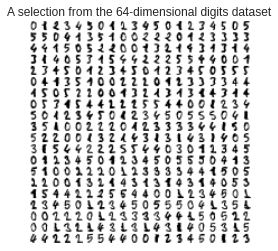

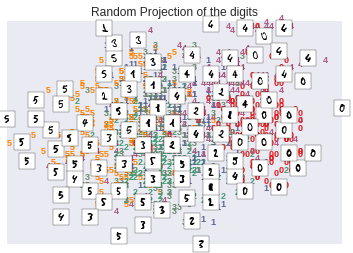

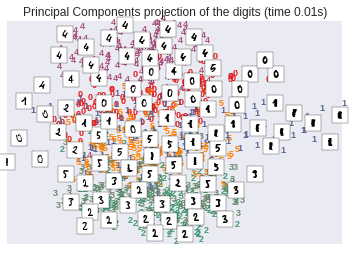

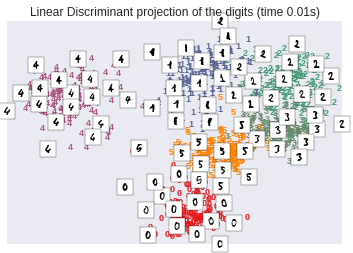

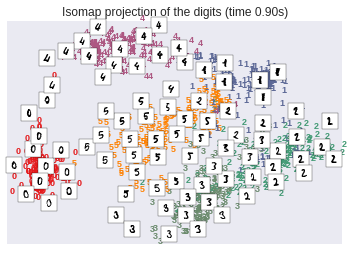

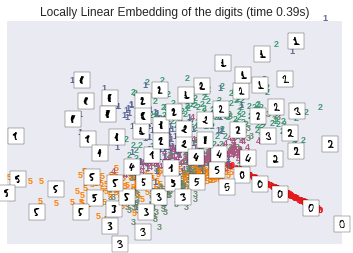

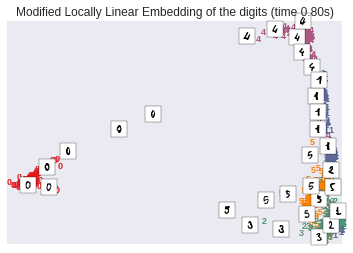

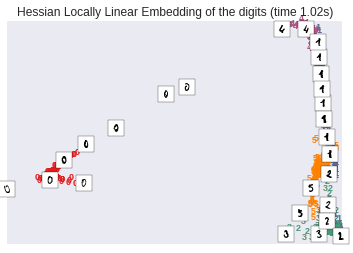

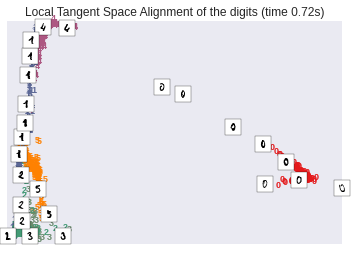

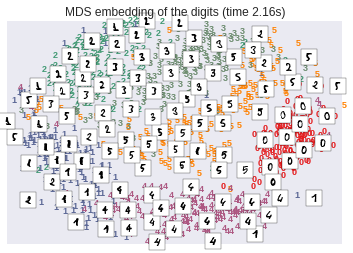

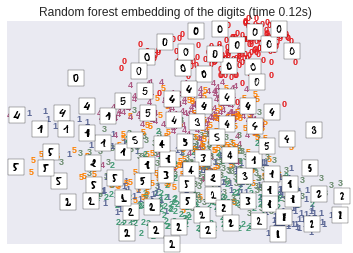

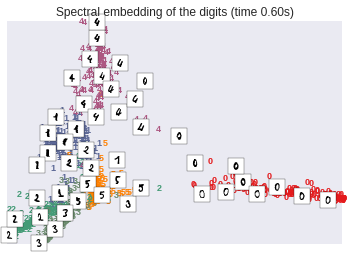

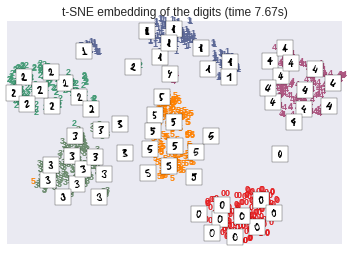

In [3]:
%run plot_lle_digits.py

In [4]:
pd.read_json("alluser_control.json")

,alluser_control
0,"{u'fr': 10, u'ranking_percentage': 0, u'rankin..."
1,"{u'fr': 10, u'ranking_percentage': 0, u'rankin..."
2,"{u'fr': 10, u'ranking_percentage': 0, u'rankin..."
3,"{u'fr': 10, u'ranking_percentage': 0, u'rankin..."
4,"{u'fr': 10, u'ranking_percentage': 0, u'rankin..."
5,"{u'fr': 10, u'ranking_percentage': 0, u'rankin..."
6,"{u'fr': 10, u'ranking_percentage': 100, u'rank..."
7,"{u'fr': 18, u'ranking_percentage': 0, u'rankin..."
8,"{u'fr': 10, u'ranking_percentage': 0, u'rankin..."
9,"{u'fr': 10, u'ranking_percentage': 0, u'rankin..."


In [5]:
import json
with open('alluser_control.json') as json_data:
    data = json.load(json_data)

# using the from_dict load function. Note that the 'orient' parameter 
#is not using the default value (or it will give the same error than you had)
# We transpose the resulting df and set index column as its index to get this result
dat=pd.DataFrame.from_dict(data['alluser_control'])

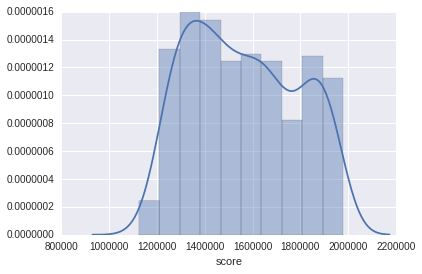

In [6]:
sns.distplot(dat.score[dat.score>2])

In [8]:
series_len=18160

def totuple(a):
    try:
        return tuple(totuple(i) for i in a)
    except TypeError:
        return a

def full_vec(pos, sig, size):
    series=np.zeros((size,), dtype=np.int)
    '''
    try:
        for i,x in enumerate(pos[:-1]):
            series[x:pos[i+1]] = sig[i]
    except Exception:
        pass'''
    for i,x in enumerate(pos[:-1]):
        series[x:pos[i+1]] = sig[i]
    #print series
    return series
full_vec(dat.ix[2,3], dat.ix[2,2], series_len)


IndexError: invalid index to scalar variable.

In [7]:
#dat["series"]=full_vec(dat.x, dat.sig, series_len)
dat["series"] = dat.apply(lambda x: totuple(full_vec(x['x'], 
                                                     x['sig'], 
                                             series_len)), 
          axis=1, raw=True)


In [62]:
def remaining_energy(consumption):
    max_batt = 0.55
    #consumption = np.linspace(0,2000000)
    #print consumption
    if consumption == -1:
        return 0
    else: 
        return 100-(consumption/36000/max_batt)


dat["rem_nrg"] = dat.apply(lambda x: remaining_energy(x.score), axis=1)

dat

,fr,id,ranking_percentage,ranking_scoreboard,score,sig,time,total_signal,userid,x,rem_nrg
0,10,1,0,-1,-1,"[1, 0, 1, 0, 1, 1]",2014-10-14T22:02:50.915Z,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2,"[174, 2048, 2771, 3535, 4847, 18160]",0.000000
1,10,2,0,-1,-1,"[1, 0, 1, 0, 1, 1]",2014-10-14T22:02:52.481Z,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2,"[174, 2048, 2771, 3535, 4847, 18160]",0.000000
2,10,3,0,-1,-1,"[1, 0, 1, 0, 1, -1, 0, -1, 0, -1, 0, -1, -1, 0...",2014-10-14T22:09:12.254Z,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2,"[177, 2269, 3530, 4470, 6773, 8792, 9205, 9495...",0.000000
3,10,4,0,-1,-1,"[1, 0, 1, 0, 1, 0, 1, 0, 1, 1]",2014-10-14T22:10:01.759Z,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2,"[177, 1932, 3339, 5307, 5930, 6564, 11775, 126...",0.000000
4,10,5,0,-1,1882614,"[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1]",2014-10-14T22:10:35.392Z,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2,"[174, 3117, 3886, 5076, 5422, 6089, 6628, 7897...",5.454545
5,10,6,0,-1,-1,"[1, 0, 1, 1]",2014-10-15T01:57:24.394Z,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,"[161, 2176, 3200, 5879]",0.000000
6,10,7,100,1,1692599,"[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1]",2014-10-15T13:50:19.563Z,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,"[176, 1529, 1635, 1892, 2027, 2309, 2934, 5799...",14.545455
7,18,8,0,-1,-1,"{u'_ArrayType_': u'double', u'_ArraySize_': [0...",2014-10-15T18:11:39.246Z,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,"{u'_ArrayType_': u'double', u'_ArraySize_': [0...",0.000000
8,10,9,0,-1,-1,"[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, ...",2014-10-15T18:12:06.498Z,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,"[173, 1215, 1669, 2567, 3164, 3293, 3572, 4818...",0.000000
9,10,10,0,-1,-1,"[-1, -1, 1, 0, -1, 0, -1, 1, 0, -1, 0, -1]",2014-10-17T15:20:22.918Z,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,"[101, 123, 124, 148, 211, 358, 431, 444, 540, ...",0.000000


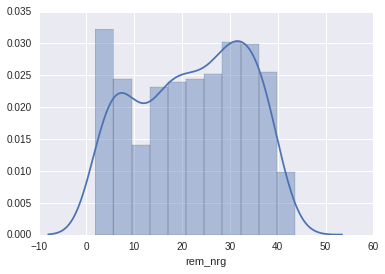

In [55]:
sns.distplot(dat.rem_nrg[dat.rem_nrg>0])

In [21]:
new_dat=np.empty((2391,18160))
for i,x in enumerate(dat.total_signal):
    new_dat[i,:]=x
new_dat.shape

(2391, 18160)

In [10]:
np.asarray(dat.series.values).shape

(2391,)

In [11]:
np.array([[0,1],[0,0],[1,1]]).shape

(3, 2)

In [12]:
new_dat.shape

(2391, 18160)

In [56]:
from time import time

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble, lda,
                     random_projection)

X = new_dat[:]

# Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(digits.target[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(digits.data.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

Computing PCA projection


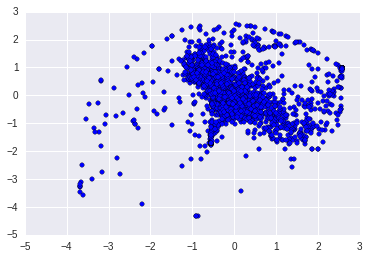

In [57]:
# Projection on to the first 2 principal components

print("Computing PCA projection")
t0 = time()
X_pca = decomposition.RandomizedPCA(n_components=2,
                                    whiten=True).fit_transform(X)
plt.scatter(X_pca[:,0], X_pca[:,1])

Computing t-SNE embedding


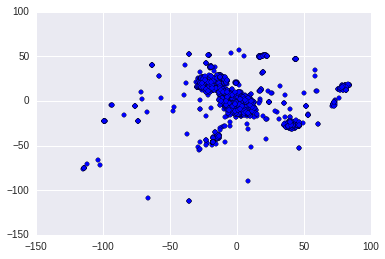

In [58]:
# t-SNE embedding of the digits dataset
print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(X)

plt.scatter(X_tsne[:,0], X_tsne[:,1])

Computing Spectral embedding


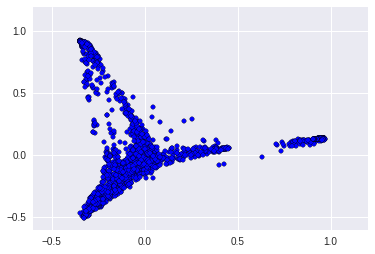

In [59]:
# Spectral embedding of the digits dataset
print("Computing Spectral embedding")
embedder = manifold.SpectralEmbedding(n_components=2, random_state=0,
                                      eigen_solver="arpack")
t0 = time()
X_se = embedder.fit_transform(X)
plt.scatter(X_se[:,0], X_se[:,1])

In [27]:
import matplotlib.cm as cm
import matplotlib
from mpl_toolkits.axes_grid1 import AxesGrid

def shiftedColorMap(cmap, start=0, midpoint=0.5, stop=1.0, name='shiftedcmap'):
    '''
    Function to offset the "center" of a colormap. Useful for
    data with a negative min and positive max and you want the
    middle of the colormap's dynamic range to be at zero

    Input
    -----
      cmap : The matplotlib colormap to be altered
      start : Offset from lowest point in the colormap's range.
          Defaults to 0.0 (no lower ofset). Should be between
          0.0 and `midpoint`.
      midpoint : The new center of the colormap. Defaults to 
          0.5 (no shift). Should be between 0.0 and 1.0. In
          general, this should be  1 - vmax/(vmax + abs(vmin))
          For example if your data range from -15.0 to +5.0 and
          you want the center of the colormap at 0.0, `midpoint`
          should be set to  1 - 5/(5 + 15)) or 0.75
      stop : Offset from highets point in the colormap's range.
          Defaults to 1.0 (no upper ofset). Should be between
          `midpoint` and 1.0.
    '''
    cdict = {
        'red': [],
        'green': [],
        'blue': [],
        'alpha': []
    }

    # regular index to compute the colors
    reg_index = np.linspace(start, stop, 257)

    # shifted index to match the data
    shift_index = np.hstack([
        np.linspace(0.0, midpoint, 128, endpoint=False), 
        np.linspace(midpoint, 1.0, 129, endpoint=True)
    ])

    for ri, si in zip(reg_index, shift_index):
        r, g, b, a = cmap(ri)

        cdict['red'].append((si, r, r))
        cdict['green'].append((si, g, g))
        cdict['blue'].append((si, b, b))
        cdict['alpha'].append((si, a, a))

    newcmap = matplotlib.colors.LinearSegmentedColormap(name, cdict)
    plt.register_cmap(cmap=newcmap)

    return newcmap

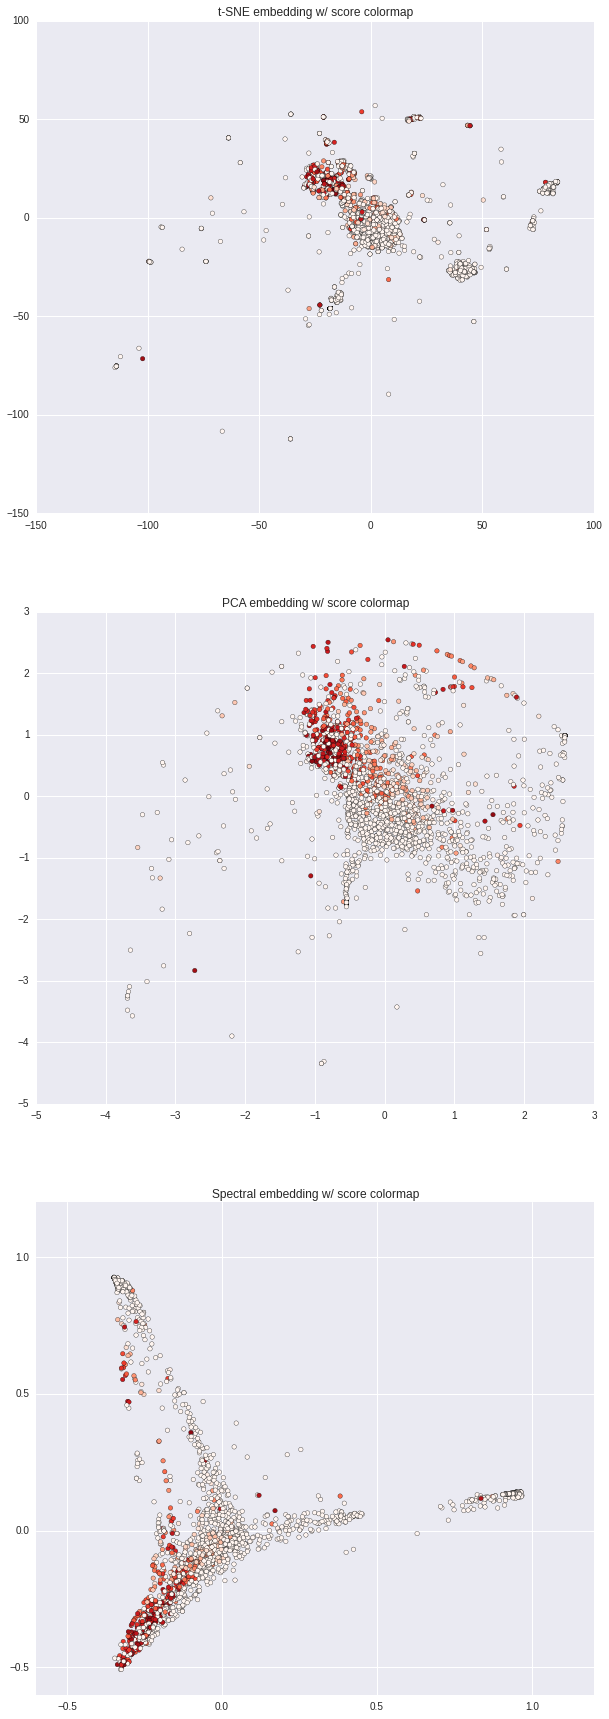

In [60]:
%matplotlib inline
f,ax = plt.subplots(nrows=3, ncols=1, figsize=(10,30))
ax[0].scatter(X_tsne[:,0], X_tsne[:,1],
            c=dat.rem_nrg.values,
            cmap=cm.Reds)
ax[0].set_title("t-SNE embedding w/ score colormap")
ax[1].scatter(X_pca[:,0], X_pca[:,1],
            c=dat.rem_nrg.values,
            cmap=cm.Reds)
ax[1].set_title("PCA embedding w/ score colormap")
ax[2].scatter(X_se[:,0], X_se[:,1],
            c=dat.rem_nrg.values,
            cmap=cm.Reds)
ax[2].set_title("Spectral embedding w/ score colormap")


In [19]:
plt

<module 'matplotlib.pyplot' from '/home/tbsexton/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

In [61]:
import plotly.plotly as py
from plotly.graph_objs import *

trace0 = Scatter(
    x=X_tsne[:,0],
    y=X_tsne[:,1],
    mode='markers',
    name='t-SNE Embed',
    text=dat.rem_nrg.values,
    marker=Marker(
        size=8,
        color=dat.rem_nrg.values
    )
)
data = Data([trace0])
py.iplot(data, filename = 'basic-line')

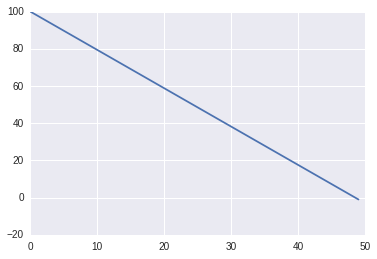

In [44]:
consumption,remaining_energy

(array([       0.        ,    40816.32653061,    81632.65306122,
          122448.97959184,   163265.30612245,   204081.63265306,
          244897.95918367,   285714.28571429,   326530.6122449 ,
          367346.93877551,   408163.26530612,   448979.59183673,
          489795.91836735,   530612.24489796,   571428.57142857,
          612244.89795918,   653061.2244898 ,   693877.55102041,
          734693.87755102,   775510.20408163,   816326.53061224,
          857142.85714286,   897959.18367347,   938775.51020408,
          979591.83673469,  1020408.16326531,  1061224.48979592,
         1102040.81632653,  1142857.14285714,  1183673.46938776,
         1224489.79591837,  1265306.12244898,  1306122.44897959,
         1346938.7755102 ,  1387755.10204082,  1428571.42857143,
         1469387.75510204,  1510204.08163265,  1551020.40816327,
         1591836.73469388,  1632653.06122449,  1673469.3877551 ,
         1714285.71428571,  1755102.04081633,  1795918.36734694,
         1836734.69387755

In [73]:
dat.groupby(['userid'])["rem_nrg"].max().order()

userid
212     0.000000
88      0.000000
87      0.000000
85      0.000000
84      0.000000
80      0.000000
79      0.000000
95      0.000000
158     0.000000
167     0.000000
139     0.000000
168     0.000000
68      0.000000
172     0.000000
66      0.000000
75      0.000000
99      0.000000
154     0.000000
101     0.000000
138     0.000000
136     0.000000
126     0.000000
125     0.000000
124     0.000000
120     0.000000
119     0.000000
149     0.000000
117     0.000000
115     0.000000
110     0.000000
         ...    
2      16.363636
106    16.363636
100    16.363636
6      16.363636
51     18.181818
74     18.181818
181    18.181818
159    18.181818
111    18.181818
27     20.000000
92     20.000000
28     21.818182
63     21.818182
180    21.818182
96     23.636364
179    23.636364
1      23.636364
175    25.454545
118    25.454545
77     27.272727
7      30.909091
36     32.727273
35     34.545455
59     34.545455
69     36.363636
67     40.000000
70     40.000000
166    

In [80]:
top6 = [78, 122, 166, 70, 67, 69] #best players
criterion = dat['userid'].map(lambda x: x in top6)

top_dat = dat[criterion]
top_dat

,fr,id,ranking_percentage,ranking_scoreboard,score,sig,time,total_signal,userid,x,rem_nrg
533,10,534,0,-1,-1,"[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1]",2014-11-04T17:32:52.005Z,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",67,"[178, 2487, 4418, 5751, 8194, 9089, 10871, 110...",0.000000
534,10,535,0,-1,-1,"[1, 0, 1, 0, 1, 0, 1, 0, 1, 1]",2014-11-04T17:33:56.213Z,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",67,"[174, 2557, 5487, 6162, 9041, 9448, 11020, 120...",0.000000
535,10,536,44,-1,1634322,"[1, 0, 1, 0, 1, 1]",2014-11-04T17:35:02.554Z,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",67,"[179, 5332, 11509, 12159, 17206, 17297]",18.181818
536,10,537,16,-1,1829986,"[1, 0, 1, 0, 1, 1]",2014-11-04T17:36:24.197Z,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",67,"[179, 5633, 10842, 11529, 15763, 16351]",9.090909
537,10,538,0,-1,-1,"[1, 0, 1, 1]",2014-11-04T17:37:40.336Z,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",67,"[179, 2280, 3930, 5555]",0.000000
538,10,539,0,-1,-1,"[1, 0, 1, 0, 1, 0, 1, 0, 1, 1]",2014-11-04T17:39:01.094Z,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",67,"[180, 3582, 5275, 6120, 9403, 9705, 12246, 126...",0.000000
539,10,540,0,-1,-1,"[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1]",2014-11-04T17:40:30.916Z,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",67,"[179, 2539, 2601, 2771, 3208, 4834, 5277, 5762...",0.000000
540,10,541,0,-1,-1,"[1, 0, 1, 0, 1, 1]",2014-11-04T17:41:47.050Z,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",67,"[179, 1513, 5757, 6288, 8876, 9397]",0.000000
543,10,544,0,-1,-1,"[0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, ...",2014-11-04T18:37:47.842Z,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",69,"[177, 178, 1997, 2234, 2467, 3047, 4826, 7400,...",0.000000
544,10,545,0,-1,-1,"{u'_ArrayType_': u'double', u'_ArraySize_': [0...",2014-11-04T18:57:42.110Z,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",70,"{u'_ArrayType_': u'double', u'_ArraySize_': [0...",0.000000


(936, 18160)
Computing t-SNE embedding


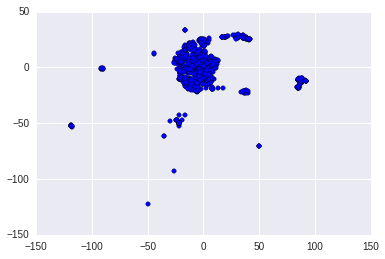

In [81]:
# t-SNE embedding of the digits dataset

top_cont=np.empty((936,18160))
for i,x in enumerate(top_dat.total_signal):
    top_cont[i,:]=x
print top_cont.shape


X = top_cont[:]

print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(X)

plt.scatter(X_tsne[:,0], X_tsne[:,1])

/home/tbsexton/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning:

in the future, boolean array-likes will be handled as a boolean array index



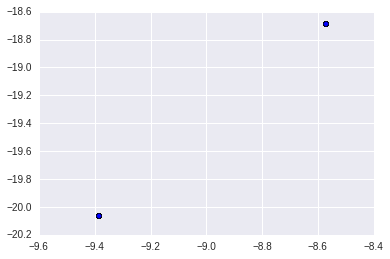

In [84]:
p1=X_tsne[top_dat.userid==78]
plt.scatter(p1[:,0], p1[:,1])

In [100]:
plt.figure(figsize=(20,10))
np.where(top_cont[top_dat.userid==78]

plt.imshow(, cmap=cm.Reds)

SyntaxError: invalid syntax (<ipython-input-100-05e3fdc3ed81>, line 2)

In [103]:
np.sum(top_cont[top_dat.userid==78][401] - top_cont[top_dat.userid==78][400])

/home/tbsexton/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning:

in the future, boolean array-likes will be handled as a boolean array index



0.0

In [106]:
top_dat[top_dat.userid==78]

,fr,id,ranking_percentage,ranking_scoreboard,score,sig,time,total_signal,userid,x,rem_nrg
639,16,640,0,-1,-1,"[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]",2014-11-05T02:56:07.553Z,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",78,"[161, 1907, 2726, 2894, 3299, 4136, 5268, 5648...",0.000000
641,15,642,0,-1,-1,"[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, ...",2014-11-05T02:57:20.633Z,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",78,"[179, 1832, 2095, 2279, 2781, 2978, 3309, 4393...",0.000000
642,15,643,65,-1,1572309,"[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, -1, -1]",2014-11-05T02:58:34.663Z,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",78,"[180, 2399, 3232, 5793, 6553, 7093, 9361, 1031...",21.818182
643,15,644,79,-1,1457227,"[1, 0, 1, 0, 1, 0, 1, 0, 1, 1, -1, -1]",2014-11-05T02:59:45.194Z,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",78,"[179, 2432, 2716, 5714, 6674, 7090, 9634, 1005...",27.272727
644,15,645,92,-1,1384488,"[1, 0, 1, 0, 1, 0, 1, 0, 1, 1, -1, -1]",2014-11-05T03:00:55.008Z,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",78,"[180, 2388, 2760, 4839, 5405, 5837, 6063, 7156...",30.909091
645,15,646,100,1,1288468,"[1, 0, 1, 0, 1, 0, 1, 0, 1, 1, -1, -1]",2014-11-05T03:02:06.250Z,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",78,"[179, 2322, 3002, 4405, 5254, 7250, 9773, 1028...",36.363636
1255,23,1310,0,-1,-1,"[1, 1]",2014-11-06T00:51:00.594Z,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",78,"[178, 181]",0.000000
1256,15,1311,84,-1,1311647,"[1, 0, 1, 0, 1, 0, 1, 0, 1, 1, -1, -1]",2014-11-06T00:51:56.333Z,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",78,"[173, 2446, 2808, 5859, 6316, 7295, 9470, 1039...",34.545455
1257,15,1312,68,-1,1433416,"[1, 0, 1, 0, 1, 0, 1, 0, 1, 1, -1, -1]",2014-11-06T00:52:33.273Z,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",78,"[175, 2444, 2664, 5896, 6274, 7262, 9376, 1050...",29.090909
1258,15,1313,0,-1,-1,"[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, -1,...",2014-11-06T00:53:05.217Z,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",78,"[172, 2413, 2673, 3829, 5181, 5793, 6128, 6519...",0.000000


In [107]:
p1_cont=np.empty((239,18160))
for i,x in enumerate(top_dat[top_dat.userid==78].total_signal):
    p1_cont[i,:]=x
print p1_cont.shape

top_dat[top_dat.userid==78].total_signal

(239, 18160)


639     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
641     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
642     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
643     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
644     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
645     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1255    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1256    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1257    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1258    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1259    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1260    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1261    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1262    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1263    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1264    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1265    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1266    [0, 0,

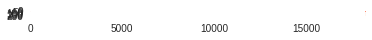

In [115]:
plt.imshow(p1_cont+1, cmap=cm.Reds, aspect="equal")

In [118]:
np.sum(p1_cont, axis=0)

array([   0.,    0.,    0., ..., -212., -212., -212.])

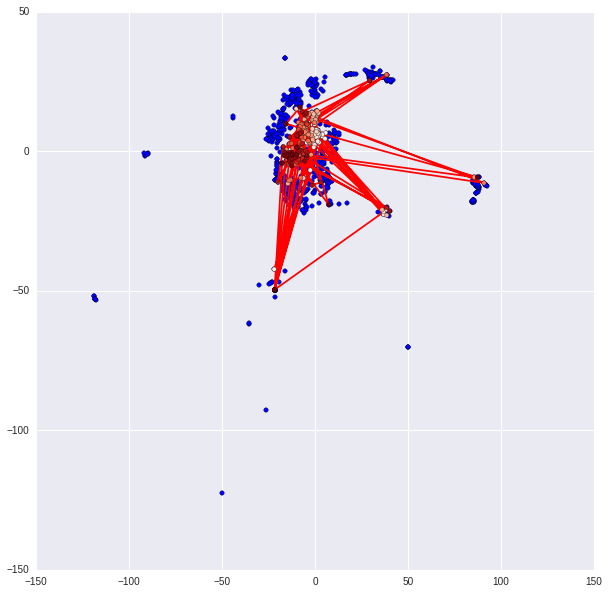

In [160]:
mask1=top_dat.userid.values==78
m1, m2, m3, m4, m5, m6 = [top_dat.userid.values==i for i in top6]
colors=[cm.Reds, cm.Blues, cm.Greys]
col=["r", "b", 'k']


plt.figure(figsize=(10,10))
plt.scatter(X_tsne[:,0], X_tsne[:,1])
for n,i in enumerate([m1]):
    plt.plot(X_tsne[i,0],X_tsne[i,1], col[n], zorder=1)
    plt.scatter(X_tsne[i,0],X_tsne[i,1], c=np.arange(0.,len(X_tsne[i,0])), 
                cmap=colors[n], zorder=2)
    

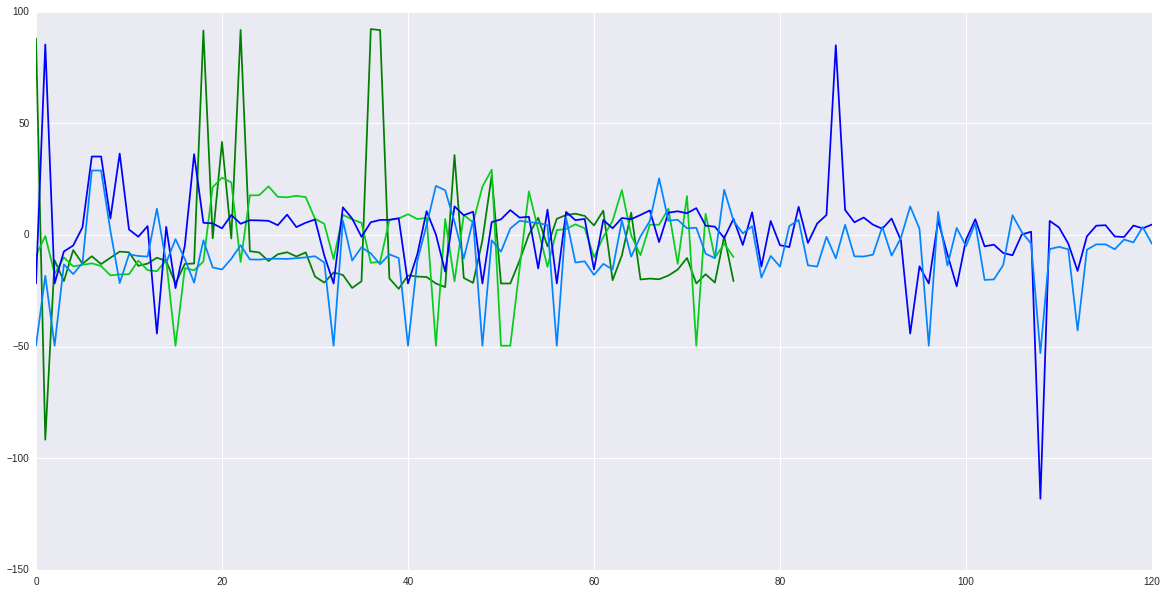

In [158]:
m1, m2, m3, m4, m5, m6 = [top_dat.userid.values==i for i in top6]
colors=[cm.Reds, cm.Blues, cm.Greys]
col1=["g", "b", 'k']
col2=["#07cd1c", '#0285ff', '#999999']
plt.figure(figsize=(20,10))
for n,i in enumerate([m3, m4]):
    plt.plot(np.arange(0.,len(X_tsne[i,0])), X_tsne[i,0], color=col1[n])
    plt.plot(np.arange(0.,len(X_tsne[i,1])), X_tsne[i,1], color=col2[n])